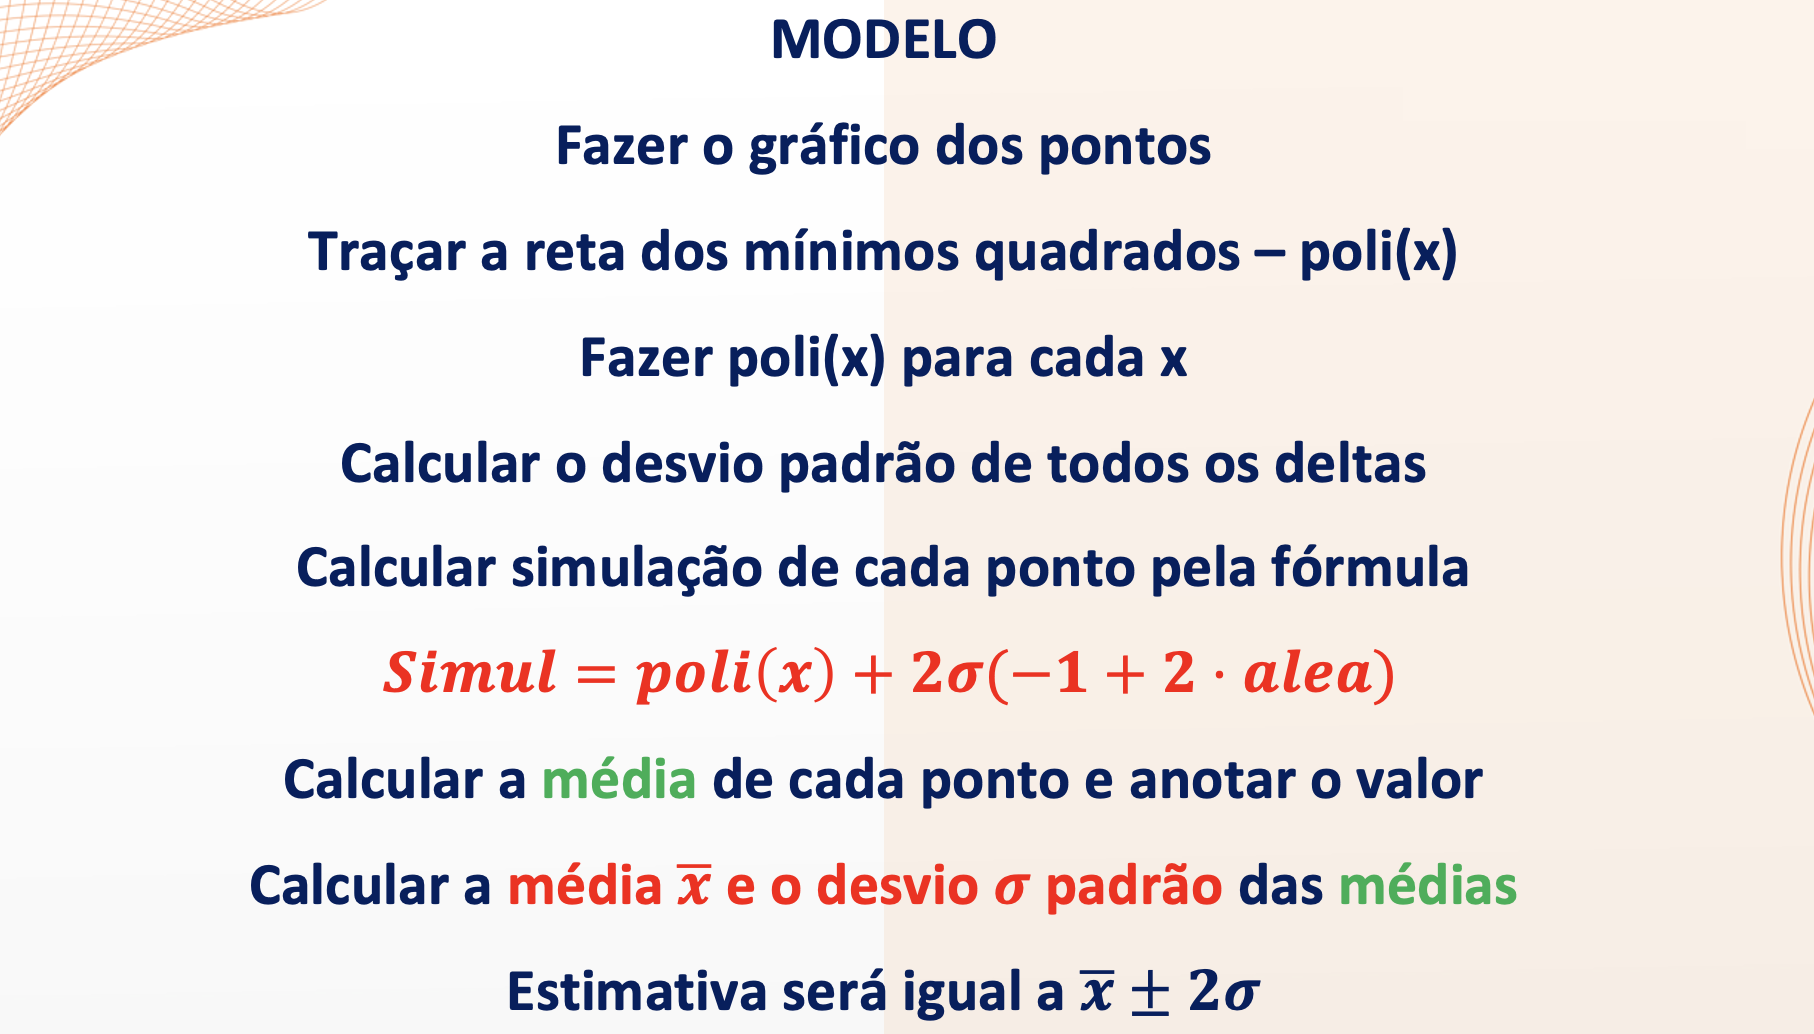

In [ ]:
!nvidia-smi

Wed Oct 25 03:08:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

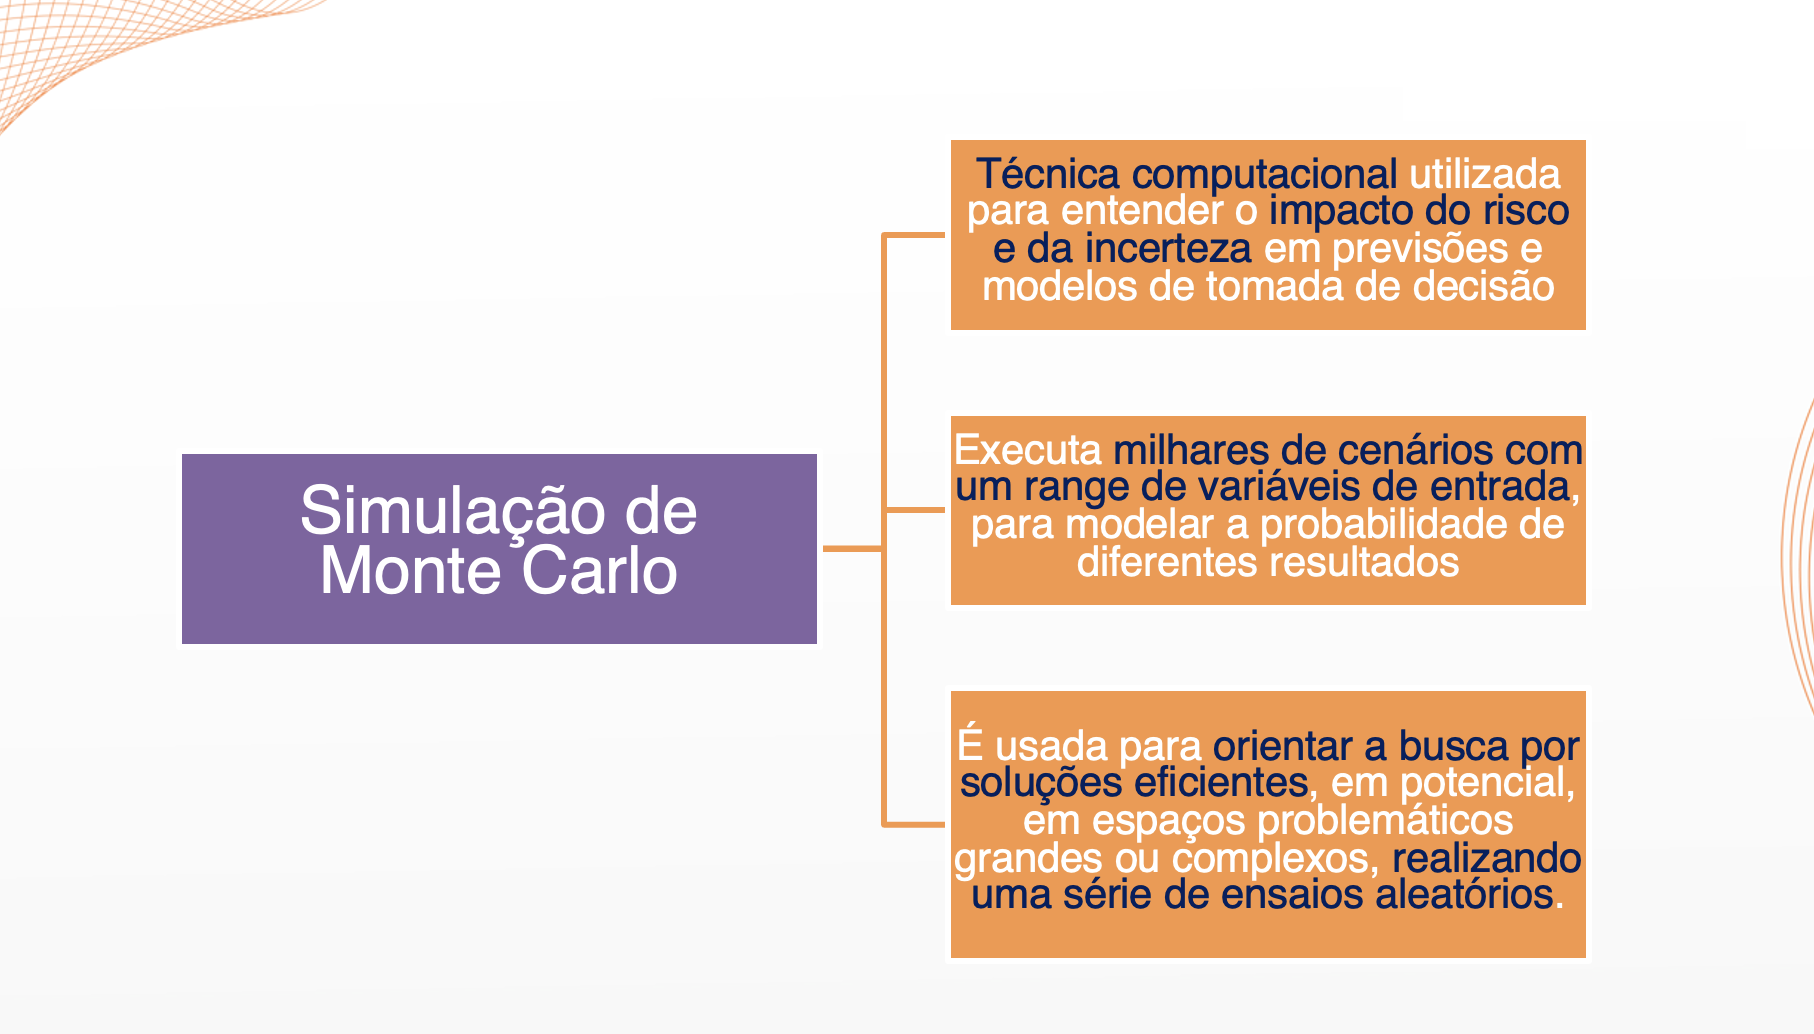

(13.165596716830697, 13.827061165899208)


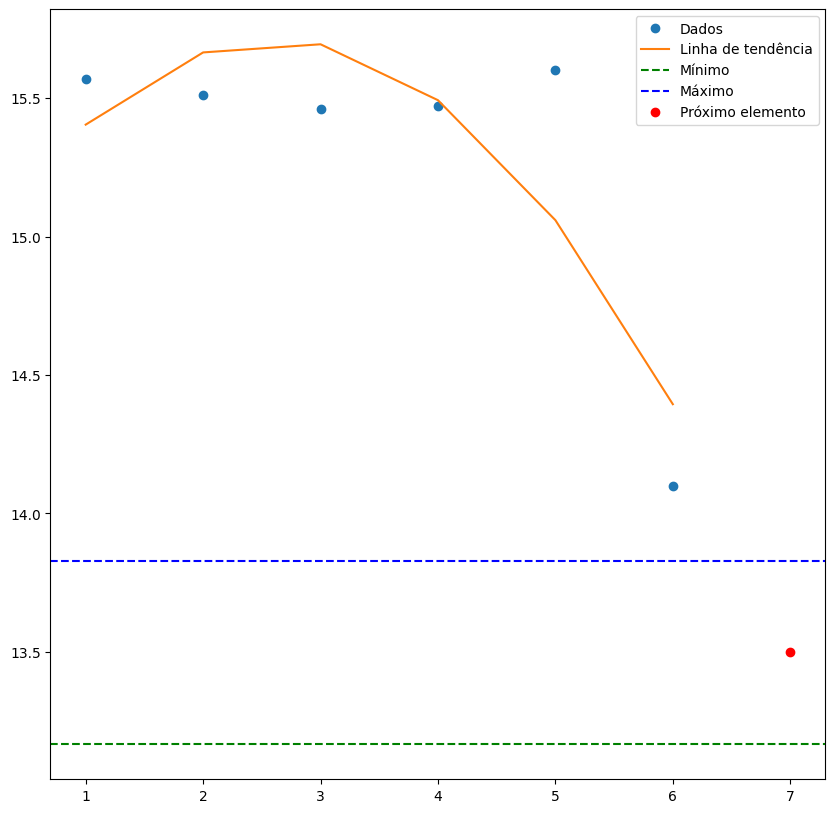

valor min: 13.165596716830697
valor max: 13.827061165899208


In [ ]:
#v4
# Mudar o modelo original, do Ricieri, conforme imagem da pasta.
## numero par de entradas
import numpy as np
import random
import matplotlib.pyplot as plt

# fornecer:
# pandas series com os dados previsores (serie)
# número de simulações (smc)


def SMC(serie, smc, grau_do_polinomio):

    # diferença entre poli(x) e x
    sigmas = []
    for i in range(int((len(serie) / 2))):
        x = np.array(range(1, int((len(serie) / 2)) + 1))
        # Calcular os coeficientes angular e linear
        coefs = np.polyfit(x, serie[i: i + int((len(serie) / 2))],
                           grau_do_polinomio)
        reta = np.poly1d(coefs)
        poli_elemento = reta(x[i])
        sigma = poli_elemento - serie[i + int((len(serie) / 2))]
        sigmas.append(sigma)

    # calculando erro padrão dos sigmas para ajudar a prever o próximo
    # tamanho = len(sigmas)
    # desvio_padrao = np.std(sigmas)
    # erro_padrao = desvio_padrao / np.sqrt(tamanho)

    # calculando previsão para o último elemento
    x = np.array(range(1, int((len(serie) / 2)) + 1))
    # Calcular os coeficientes angular e linear para o último elemento
    coefs_final = np.polyfit(x, serie[int((len(serie) / 2)):],
                             grau_do_polinomio)
    tendencia_final = np.poly1d(coefs_final)
    poli_el_final = tendencia_final(len(x) + 1)

    # Aplicando smc simulações de Monte Carlo e salvando os resultados
    simulacoes = []
    for i in range(smc):
        previsao = poli_el_final + np.mean(sigmas) * random.uniform(-1, 1)
        simulacoes.append(previsao)

    # calcular a média dos valores apontados nas simulações
    media = np.mean(simulacoes)

    # calcular o erro padrão dos valores apontados nas simulações

    desvio_padrao_final = np.std(simulacoes)
    erro_padrao_final = desvio_padrao_final  # np.sqrt(tamanho_simulacoes)

    valor_min = media - 2 * erro_padrao_final
    valor_max = media + 2 * erro_padrao_final

    return valor_min, valor_max



## numero par de entrada
serie = [15.62, 15.61, 15.61, 15.57, 15.58, 15.56, 15.57, 15.51, 15.46, 15.47]



# próximo é 15.46
smc = 1000
grau_do_polinomio = 2

a = SMC(serie, smc, grau_do_polinomio)
print(a)

# Criar o eixo x com base no índice dos elementos
x = np.array(range(1, int((len(serie) / 2)) + 1))

# Criar uma regressão linear
coeficients = np.polyfit(x, serie[int((len(serie) / 2)):], 2)
tendencia = np.poly1d(coeficients)

# Calcular a previsão do próximo elemento
proximo_elemento = tendencia(len(x) + 1)

# Plotar os dados e a linha de tendência
plt.figure(figsize=(10, 10))
plt.plot(x, serie[int((len(serie) / 2)):], 'o', label='Dados')
plt.plot(x, tendencia(x), label='Linha de tendência')

# Adicionar linha vertical com os valores mínimo, máximo e previsão
plt.axhline(y=a[0], color='g', linestyle='--', label='Mínimo')
plt.axhline(y=a[1], color='b', linestyle='--', label='Máximo')

# Exibir o próximo elemento previsto
plt.plot(1 + len(x), proximo_elemento, 'ro', label='Próximo elemento')

# Exibir legenda
plt.legend()

# Exibir o gráfico
plt.show()


print ('valor min:', a[0])
print ('valor max:', a[1])

(15.477751471313479, 15.527301160265495, -9.569377990419273e-05, -0.0023814080656204793, 15.594736842105265)


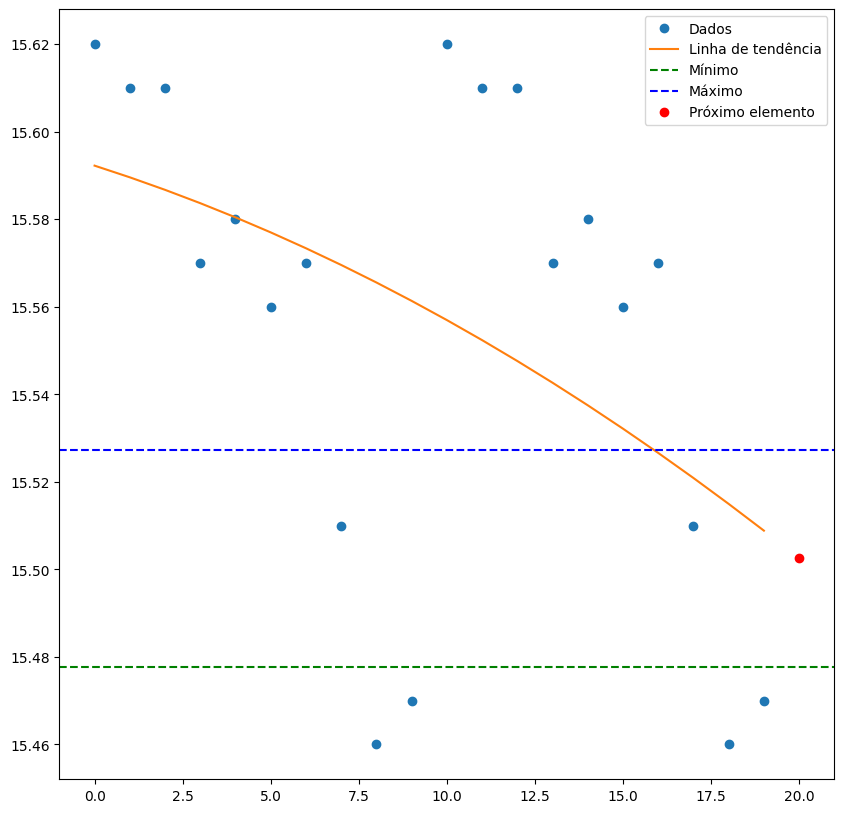

In [ ]:
## v3


import numpy as np
import random
import statistics
import matplotlib.pyplot as plt

# fornecer:
# pandas series com os dados previsores (serie) - par numeros
# número de simulações (smc)


def SMC(serie, smc):

    x = np.array(range(1, len(serie) + 1))
    # Calcular os coeficientes angular e linear
    # coef_angular, coef_linear = np.polyfit(x, serie, 1)
    a, b, c = np.polyfit(x, serie, 2)

    def motor_MC(serie):
        simulacao = []
        for i in range(len(serie)):
            poli_elemento = a * i**2 + b * i + c
            delta_elemento = abs(serie[i] - poli_elemento)
            simulacao_elemento = poli_elemento + 2 * delta_elemento * (
                - 1 + 2 * random.random())
            simulacao.append(simulacao_elemento)
        media = sum(simulacao) / len(simulacao)  # original
        return media

    def smc_gen(serie, smc, a, b, c):
        sim_smc = []
        for i in range(smc):
            sim_smc_por_vez = motor_MC(serie)
            sim_smc.append(sim_smc_por_vez)

        previsao = a * ((len(serie) + 1)**2) + b * (len(serie) + 1) + c

        erro = statistics.stdev(sim_smc)

        valor_min = previsao - 2 * erro
        valor_max = previsao + 2 * erro

        return valor_min, valor_max, a, b, c

    return smc_gen(serie, smc, a, b, c)


serie = [15.62, 15.61, 15.61, 15.57, 15.58, 15.56, 15.57, 15.51, 15.46, 15.47, 15.62, 15.61, 15.61, 15.57, 15.58, 15.56, 15.57, 15.51, 15.46, 15.47]
# próximo é 15.46
smc = 1000

a = SMC(serie, smc)
print(a)


# Criar o eixo x com base no índice dos elementos
x = np.arange(len(serie))

# Criar uma regressão linear
coeficients = np.polyfit(x, serie, 2)
tendencia = np.poly1d(coeficients)

# Calcular a previsão do próximo elemento
proximo_elemento = a[2] * ((len(serie) + 1)**2) + a[3] * (len(serie) + 1) + a[4]

# Plotar os dados e a linha de tendência
plt.figure(figsize=(10, 10))
plt.plot(x, serie, 'o', label='Dados')
plt.plot(x, tendencia(x), label='Linha de tendência')

# Adicionar linha vertical com os valores mínimo, máximo e previsão
plt.axhline(y=a[0], color='g', linestyle='--', label='Mínimo')
plt.axhline(y=a[1], color='b', linestyle='--', label='Máximo')

# Exibir o próximo elemento previsto
plt.plot(len(serie), proximo_elemento, 'ro', label='Próximo elemento')

# Exibir legenda
plt.legend()

# Exibir o gráfico
plt.show()


(15.554369210463008, 15.592840962429044)


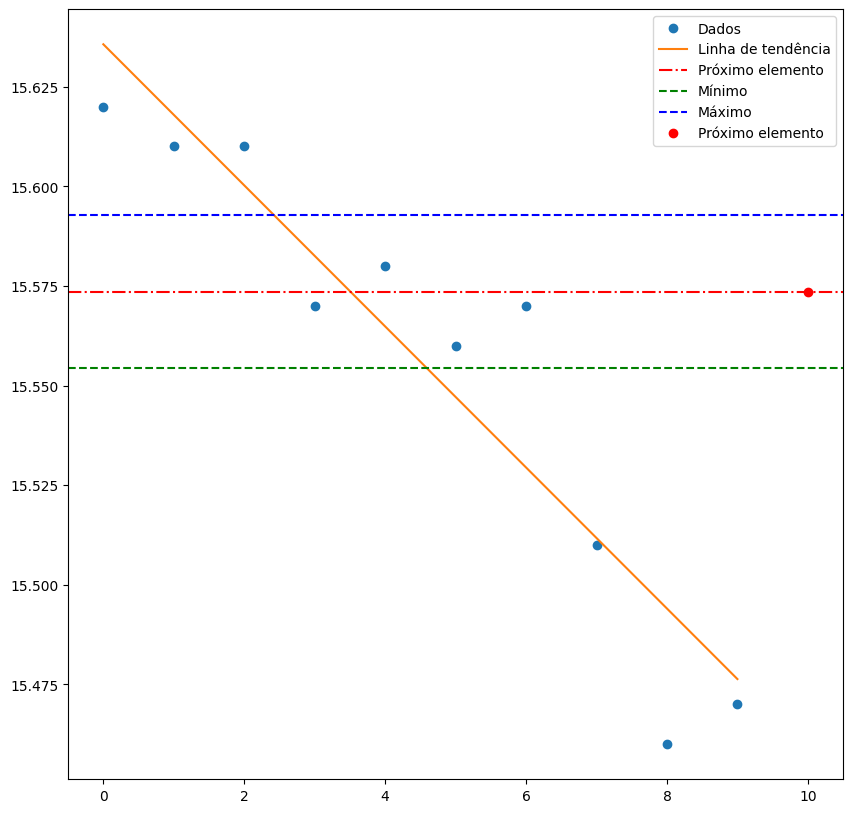

In [ ]:
##v2

import numpy as np
import random
import statistics
import matplotlib.pyplot as plt

# fornecer:
# pandas series com os dados previsores (serie)
# número de simulações (smc)


def SMC(serie, smc):

    x = np.array(range(1, len(serie) + 1))
    # Calcular os coeficientes angular e linear
    coef_angular, coef_linear = np.polyfit(x, serie, 1)

    def motor_MC(serie):
        simulacao = []
        for i in range(len(serie)):
            poli_elemento = coef_angular * i + coef_linear
            delta_elemento = abs(serie[i] - poli_elemento)
            simulacao_elemento = poli_elemento + 2 * delta_elemento * (
                - 1 + 2 * random.random())
            simulacao.append(simulacao_elemento)
        media = sum(simulacao) / len(simulacao)  # Original
        return media

    def smc_gen(serie, smc, coef_angular, coef_linear):
        sim_smc = []
        for i in range(smc):
            sim_smc_por_vez = motor_MC(serie)
            sim_smc.append(sim_smc_por_vez)

        # previsao = coef_angular * (len(serie) + 1) + coef_linear
        previsao = statistics.mean(sim_smc)  # Original
        erro = statistics.stdev(sim_smc)

        valor_min = previsao - 2 * erro
        valor_max = previsao + 2 * erro

        return valor_min, valor_max

    return smc_gen(serie, smc, coef_angular, coef_linear)


serie = [15.62, 15.61, 15.61, 15.57, 15.58, 15.56, 15.57, 15.51, 15.46, 15.47]
# próximo é 15.46
smc = 1000


a = SMC(serie, smc)
print(a)

# Criar o eixo x com base no índice dos elementos
x = np.arange(len(serie))

# Criar uma regressão linear
coeficients = np.polyfit(x, serie, 1)
tendencia = np.poly1d(coeficients)

# Calcular a previsão do próximo elemento
proximo_elemento = (a[0] + a[1]) / 2

# Plotar os dados e a linha de tendência
plt.figure(figsize=(10, 10))
plt.plot(x, serie, 'o', label='Dados')
plt.plot(x, tendencia(x), label='Linha de tendência')

# Adicionar linha vertical com os valores mínimo, máximo e previsão
plt.axhline(y=proximo_elemento, color='r', linestyle='-.', label='Próximo elemento')
plt.axhline(y=a[0], color='g', linestyle='--', label='Mínimo')
plt.axhline(y=a[1], color='b', linestyle='--', label='Máximo')

# Exibir o próximo elemento previsto
plt.plot(len(serie), proximo_elemento, 'ro', label='Próximo elemento')

# Exibir legenda
plt.legend()

# Exibir o gráfico
plt.show()

(15.555282837953367, 15.592719867538694)


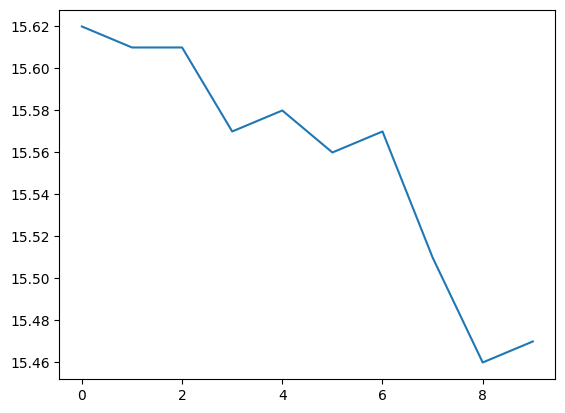

In [ ]:
## v1

import numpy as np
import random
import statistics
import matplotlib.pyplot as plt

# fornecer:
# pandas series com os dados previsores (serie)
# número de simulações (smc)


def SMC(serie, smc):
    def motor_MC(serie):
        x = np.array(range(1, len(serie) + 1))

        # Calcular os coeficientes angular e linear
        coef_angular, coef_linear = np.polyfit(x, serie, 1)

        simulacao = []
        for i in range(len(serie)):
            poli_elemento = coef_angular * i + coef_linear
            delta_elemento = abs(serie[i] - poli_elemento)
            simulacao_elemento = poli_elemento + 2 * delta_elemento * (
                - 1 + 2 * random.random())
            simulacao.append(simulacao_elemento)
        media = sum(simulacao) / len(simulacao)  # original
        return media

    def smc_gen(serie, smc):
        sim_smc = []
        for i in range(smc):
            sim_smc_por_vez = motor_MC(serie)
            sim_smc.append(sim_smc_por_vez)

        previsao = sum(sim_smc) / len(sim_smc)

        erro = statistics.stdev(sim_smc)

        valor_min = previsao - 2 * erro
        valor_max = previsao + 2 * erro

        return valor_min, valor_max

    return smc_gen(serie, smc)


serie = [15.62, 15.61, 15.61, 15.57, 15.58, 15.56, 15.57, 15.51, 15.46, 15.47]
smc = 1000

a = SMC(serie, smc)
print(a)

plt.plot(serie)
